<a href="https://colab.research.google.com/github/ameyadalvi84/Beans_dataset/blob/master/Beans_dataset_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Beans data set from tensoflow

In [53]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds
from tensorflow.keras import regularizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [54]:
%matplotlib inline
sns.set_style("whitegrid")

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
target = (150,150)
#train_images.max()
#train_images.min()
train_datagen = ImageDataGenerator(rescale= 1/255.,
                                   height_shift_range = 2.0,
                                   width_shift_range = 2.0,
                                   rotation_range = 40,
                                   shear_range = 2.0,
                                   zoom_range = 2.0,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest')
test_datagen = ImageDataGenerator(rescale=1/255.)
train_generator = train_datagen.flow_from_directory('/tmp/Train/',
                                batch_size=batch_size,
                                target_size=target)
validation_generator = test_datagen.flow_from_directory('/tmp/Validation/',
                                    target_size = target)

Found 1034 images belonging to 4 classes.
Found 133 images belonging to 4 classes.


In [56]:
from tensorflow.keras.applications import VGG16,ResNet50,InceptionV3

In [57]:
conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150,150,3))
#conv_base.trainable = False

#ResNet50
#conv_base = ResNet50(weights = 'imagenet',
#                  include_top = False,
#                  input_shape = (128,128,3))
conv_base.trainable = False

In [58]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [59]:
def build_model():
  model=models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(128,activation='relu'))
  model.add(layers.Dropout(0.4))
  model.add(layers.Dense(4,activation='softmax'))
  return model

In [70]:
np.random.seed(1234)
model1 = build_model()
model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4),loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [71]:
history1 = model1.fit(train_generator,
                      steps_per_epoch = 1034 // batch_size,
                      batch_size = batch_size,
                      epochs = 50,
                      validation_data = validation_generator)

Epoch 1/50
32/32 [==============================] - 14s 434ms/step - loss: 1.2681 - accuracy: 0.3743 - val_loss: 0.9315 - val_accuracy: 0.5789
Epoch 2/50
32/32 [==============================] - 14s 428ms/step - loss: 0.9805 - accuracy: 0.5050 - val_loss: 0.7575 - val_accuracy: 0.7218
Epoch 3/50
32/32 [==============================] - 14s 425ms/step - loss: 0.9571 - accuracy: 0.5319 - val_loss: 0.9316 - val_accuracy: 0.5564
Epoch 4/50
32/32 [==============================] - 14s 426ms/step - loss: 0.9340 - accuracy: 0.5399 - val_loss: 0.6805 - val_accuracy: 0.7519
Epoch 5/50
32/32 [==============================] - 14s 424ms/step - loss: 0.9063 - accuracy: 0.5539 - val_loss: 0.7549 - val_accuracy: 0.6842
Epoch 6/50
32/32 [==============================] - 14s 425ms/step - loss: 0.8716 - accuracy: 0.5778 - val_loss: 0.6729 - val_accuracy: 0.7293
Epoch 7/50
32/32 [==============================] - 14s 428ms/step - loss: 0.8854 - accuracy: 0.5599 - val_loss: 0.6756 - val_accuracy: 0.7368

In [72]:
history1_dict = history1.history
history1_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

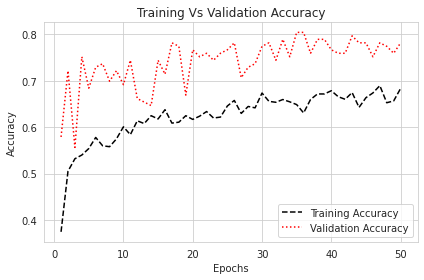

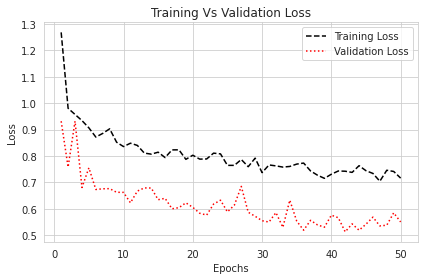

In [73]:
val_loss1 = history1_dict['val_loss']
val_acc1 = history1_dict['val_accuracy']
loss1 = history1_dict['loss']
acc1 = history1_dict['accuracy']
epoch_num = range(1,len(acc1)+1)

plt.plot(epoch_num,acc1,'k--',label = "Training Accuracy")
plt.plot(epoch_num,val_acc1,'r:',label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Vs Validation Accuracy")
plt.legend()
plt.tight_layout()

plt.figure()
plt.plot(epoch_num,loss1,'k--',label = "Training Loss")
plt.plot(epoch_num,val_loss1,'r:',label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Vs Validation Loss")
plt.legend()
plt.tight_layout()

plt.show()

In [74]:
test_generator = test_datagen.flow_from_directory('/tmp/Test',target_size = target)

Found 128 images belonging to 4 classes.


In [75]:
result1 = model1.evaluate_generator(test_generator)
result1

[0.5112929344177246, 0.78125]